In [1]:
%matplotlib inline

In [2]:
# Import packages:
import time
import numpy as np
from math import comb
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt

# Monte Carlo Methods 🎲 & Option Pricing💲

### by Zhivko Milchev

### Content:

### Content:

   1. [Abstract](#1.-Abstract) 
   2. [Introduction](#2.-Introduction)
   3. [Monte Carlo Integration](#3.-Monte-Carlo-Integration)
   4. [Introduction to Options](#4.-Introduction-to-Options)
   5. [Binomial Option Pricing Model](#5.-Binomial-Option-Pricing-Model)
   6. [Vanilla Option Pricing](#6.-Vanilla-Option-Pricing)
   7. [Path Dependent Options](#7.-Path-Dependent-Options)
   8. [Conclusion](#8.-Conclusion)
   9. [Resources](#9.-Resources)
   10. [Appendix](#10.-Appendix)

### 1. Abstract

<p style='text-align: justify;'>&emsp;This notebook introduces Monte Carlo methods along with some of their applications in finance. Firstly, we discuss the rationale behind using simulations in practice as well as in mathematics and science. We then demonstrate how the need for probabilistic methods arises in numerical integration. Next, we turn our attention to options and debate their importance. The binomial model for option pricing is introduced in great detail. We then proceed to find the value of several types of options and demonstrate that an analytical solution is sometimes hard to obtain or even impossible, thus justifying the application of Monte Carlo simulations in option pricing. In conclusion, we address some drawbacks of using Monte Carlo simulations in practice and consider alternatives.</p>

### 2. Introduction

<p style='text-align: justify;'>&emsp;A simulation is a model that imitates the operations of a real-world or proposed system. The model allows us to gain insight into what effects different sets of conditions can have on the system. Models can also help us identify causality and conduct what-if analyses. In other words, simulations are a convenient tool that could help us understand how the world works.</p>

<p style='text-align: justify;'>&emsp;In practice, simulations are essential in developing and optimizing most devices, processes, or strategies. Computational models are favoured because they are usually more feasible, reproducible, affordable, or safer than testing in real life. Furthermore, simulations could be used for stress-testing to evaluate extreme scenarios.</p>

<p style='text-align: justify;'>&emsp;Simulations are often used in natural sciences (physics, chemistry, biology) and engineering to model physical systems. However, social sciences (economics, psychology) also use simulations to model non-physical systems such as human behavior.</p>

<p style='text-align: justify;'>&emsp;Mathematical models are at the heart of computational simulations. These mathematical models can be classified into many different categories: linear and non-linear, static and dynamic, discrete and continuous, etc. Models can also be deterministic or stochastic. A deterministic model will always produce the same output from a given input. On the other hand, randomness is present in a stochastic model as some of the variables are not described by unique values but by probability distributions instead.</p>

<p style='text-align: justify;'>&emsp;When uncertainty is inherent to the system we are trying to model statistics become quite useful. A particular outcome of the simulation on its own is not as informative as the statistical properties of the distribution of outcomes. We are interested in knowing more about the probability distribution rather than just a single draw from that distribution.</p>

<p style='text-align: justify;'>&emsp;Uncertainty in a simulation is modeled using pseudorandom number generators (PRNG). PRNGs are algorithms that generate sequence of numbers whose properties closely approximate those of a sequence of random numbers. The pseudorandom numbers are usually uniformly distributed. However, a uniform random variable can be modified into any other random varaible using the <a href="https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html">inverse-transform method</a>. Then the realizations of the new random variable are used in the mathematical model to calculate the results of the simulation.
</p>

<p style='text-align: justify;'>&emsp;Monte Carlo methods are a class of computational algorithms that rely on repeated sampling to obtain numerical results. Monte Carlo simulations are typically applied to physical and mathematical problems where other approaches are difficult or impossible to implement. Often the reason for using Monte Carlo simulations is that alternative methods are bounded by either real-world or computational time. The underlying idea is to use randomness to solve problems that might be deterministic in principle. Monte Carlo methods are mainly used for numerical integration, sampling probability distributions and numerical optimization.</p>

### 3. Monte Carlo Integration

#### Estimating 𝜋 by Monte Carlo Integration
Monte Carlo methods, although random in nature, can be used to solve deterministic problems. To demonstrate this, we will estimate the value of $\pi$ using Monte Carlo integration.

Suppose we have a circle with radius $r$. We know that the area $A$ of the circle is given by $\pi r^2$. Now consider the following indicator function:
$$ $$
$$\begin{equation}
\mathbb{1}\{x^2 + y^2 \leq r^2\} = \left\{
    \begin{array}\\
        1 & \mbox{if } \ x^2 + y^2 \leq r^2\\
        0 & \mbox{otherwise }\\
    \end{array}
\right.
\label{eq:indicator_function} \tag{3.1}
\end{equation}$$
$$ $$
This indicator function tells us whether a point with coordinates $(x, y)$ lies withing a circle with radius $r$ centered at $(0, 0)$. Therefore, we can also express the area of the cirlce as:
$$ $$
$$\begin{equation}
A = \int_{-r}^{r} \int_{-r}^{r} \mathbb{1}\{x^2 + y^2 \leq r^2\}\text{d}x\text{d}y
\label{eq:area_of_circle} \tag{3.2}
\end{equation} $$
$$ $$
Let us rewrite the integral in terms of a random $x$ and $y$, distributed according to a continuous uniform distribution with support on $[-r, r]$. The density of the distribution is $p(x)=p(y)=0.5r$ along its support and $0$ otherwise. Finally, let $ f(x, y) = \mathbb{1}\{x^2 + y^2 \leq r^2\}$. Thus, we can write:
$$ $$
$$ A = (2r)(2r)\int_{-r}^{r}\int_{-r}^{r} f(x, y)p(x)p(y) \text{d}x \text{d}y $$
$$ $$
$$ A = 4r^2\int_{-r}^{r}\int_{-r}^{r} f(x, y)p(x)p(y) \text{d}x \text{d}y $$
$$ $$
$$ A \approx 4r^2\frac{1}{N} \sum_{i=1}^{N}f(x_i, y_i)$$
$$ $$

And since we know that $A=\pi r^2$ it follows that:
$$ $$
$$\begin{equation}
\pi \approx \frac{4}{N} \sum_{i=1}^{N}f(x_i, y_i) 
\label{eq:monte_carlo_pi_estimate} \tag{3.3}
\end{equation} $$

<p style='text-align: justify;'>&emsp;Alternatively, the $\pi$ estimation problem can be solved by using a Riemann sum to approximate the integral. Contrary to Monte Carlo integration, this method is deterministic since it will always produce the same estimate given identical inputs. We could approximate equation $(2)$ as:</p>
$$ $$
$$\begin{equation}
A \approx \sum_{i=1}^{N}\sum_{j=1}^{N}f(x_i^*, y_j^*) \Delta x_i \Delta y_j
\label{eq:riemann_sum_pi_estimate} \tag{3.4}
\end{equation} $$
$$ $$
where $ \Delta x_i = x_{i} - x_{i-1} $ and the midpoint rule is used $ x_i^* = \left(x_{i} + x_{i-1}\right)/2 $. Likewise for $ y $.

<p style='text-align: justify;'>&emsp;The following cells contain the functions that will be used to implement the Monte Carlo integration and the Riemann sum approximation. However, in order to better compare the performance of the two methods let also us consider the more general problem of calculating the volume of an n-sphere. In this case, the indicator function is given by:</p>
$$ $$
$$\begin{equation}
\mathbb{1} \bigg\{\sum_{i=1}^{n} x_i^2 \leq r^2 \bigg\} = \left\{
    \begin{array}\\
        1 & \mbox{if } \ \sum_{i=1}^{n} x_i^2 \leq r^2 \\
        0 & otherwise \\
    \end{array}
\right.
\label{eq:n_sphere_indicator_function} \tag{3.5}
\end{equation}$$
$$ $$
The volume of an n-sphere can be expressed as:
$$ $$
$$\begin{equation}
V_{n-1} = \int_{-r}^{r}... \int_{-r}^{r} \mathbb{1}\bigg\{\sum_{i=1}^{n} x_i^2 \leq r^2 \bigg\}\text{d}x_i...\text{d}x_n
\label{eq:n_sphere_volume} \tag{3.6}
\end{equation} $$
$$ $$
Therefore, the Monte Carlo estimate for the volume of an n-sphere is:
$$ $$
$$\begin{equation}
V_{n-1} \approx (2r)^n\frac{1}{S} \sum_{i=1}^{N}f(x_1^{(i)}, ...,x_n^{(i)})
\label{eq:monte_carlo_n_sphere_estimate} \tag{3.7}
\end{equation} $$
$$ $$
where $ f(x_1, ..., x_n) $ is the indicator function from equation (3.5).

Lastly, the Riemann sum estimate for the volume of an n-sphere is given by:
$$ $$
$$\begin{equation}
V_{n-1} \approx \sum_{i_1=1}^{N}...\sum_{i_n=1}^{N}f(x_{i_1}^*, ...,x_{i_n}^*) \Delta x_{i_1} ...\Delta x_{i_n}
\label{eq:riemann_sum_n_sphere_estimate} \tag{3.8}
\end{equation} $$
$$ $$

In [3]:
def random_sampling(sample_size, dims, r):
    """
    This function generates samples from a uniform distribution with support between -r and r.
    This is done for both the x and y coordinates
    :param sample_size: int; number of samples to be generated
    :param dims: int; number of dimension
    :param r: float; radius of the circle, defines the boundaries of the uniform distribution
    :return: np.array; realization of X
    """
    x = np.random.uniform(low=-r, high=r, size=(sample_size, dims))
    return x

In [4]:
def n_sphere_indicator_function(x, r):
    """
    An indicator function that returns 1 if the point (x_1, x_2, ..., x_n) lies within an
    n-sphere with center (0, 0, ..., 0) and radius r; see equation (3.5)
    :param x: point corrdinates
    :param r: float; radius of the circle
    :return: list; boolean value(s)
    """
    output = list(map(int, np.sum(x**2, axis=1) < r**2))
    return output

In [5]:
def unit_n_sphere_indicator_function(x):
    """
    A special case of n_sphere_indicator_function where the radius is 1.
    :param x: point corrdinates
    :param r: float; radius of the circle
    :return: list; boolean value(s)
    """
    return n_sphere_indicator_function(x, 1)

In [6]:
def monte_carlo_integration(func, x):
    """
    Monte Carlo integration funciton.
    :param func: function we are integrating
    :param x: sampled points
    :return: float; Monte Carlo estimate
    """
    n = len(x)
    result = (1/n) * np.sum(func(x))
    return result

In [7]:
def monte_carlo_unit_n_sphere_volume_estimate(x):
    """
    Monte Carlo estimate for the volume of an n-sphere. see equation (3.7)
    :param func: function we are integrating
    :param x: sampled points
    :return: float; Monte Carlo estimate
    """
    dims = len(x[0])
    result  = (2*r) ** dims * monte_carlo_integration(unit_n_sphere_indicator_function, x)
    return result

In [8]:
def calculate_pi_estimate(x):
    """
    Calculate an estimate of pi based on sampled points between -1 and 1 in each dimension.
    see equation (3.3)
    :param x: sampled points
    :return: float; estimated value of pi
    """
    sample_size = len(x)
    pi_estimate = 4*monte_carlo_integration(unit_n_sphere_indicator_function, x)
    return pi_estimate

In [9]:
def plot_sampled_points_2d(x, r, title="", alpha=0.3):
    """
    This function plots the sampled points.
    :param x: sampled points
    :param r: float; radius of the circle
    :param title: string; title of the chart
    :param alpha: float; between 0 and 1, controls transperancy of the points
    """
    indicator_values = n_sphere_indicator_function(x, r)
    color_mapping = {0: '#d62728', 1: '#1f77b4'}
    colors = [color_mapping[value] for value in indicator_values]
    x = x.T
    plt.rcParams["figure.figsize"] = (7, 7)
    ax = plt.gca()
    ax.patch.set_alpha(0)
    plt.scatter(x[0], x[1], c=colors, alpha=alpha)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    plt.close()

In [10]:
def plot_monte_carlo_pi_estimate_samples(x, y, r, title="", alpha=0.3):
    """
    This function plots the sampled points.
    :param x: x-corrdinates
    :param y: y-corrdinates
    :param r: float; radius of the circle
    :param title: string; title of the chart
    :param alpha: float; between 0 and 1, controls transperancy of the points
    """
    indicator_values = indicator_function(x, r)
    color_mapping = {0: '#d62728', 1: '#1f77b4'}
    colors = [color_mapping[value] for value in indicator_values]

    plt.rcParams["figure.figsize"] = (7, 7)
    ax = plt.gca()
    ax.patch.set_alpha(0)
    plt.scatter(x, y, c=colors, alpha=alpha)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    plt.close()

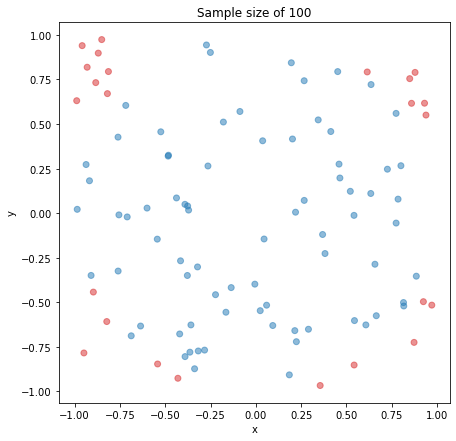

𝜋̂ based on a sample of 100: 3.04


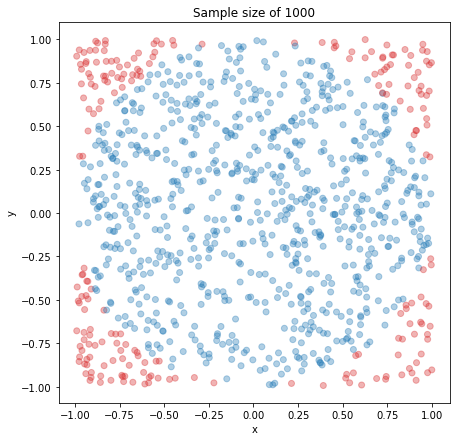

𝜋̂ based on a sample of 1000: 3.124


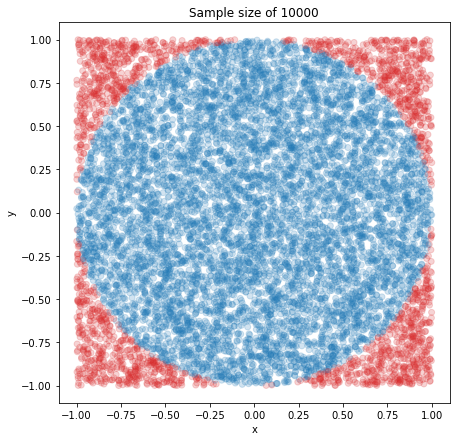

𝜋̂ based on a sample of 10000: 3.1512


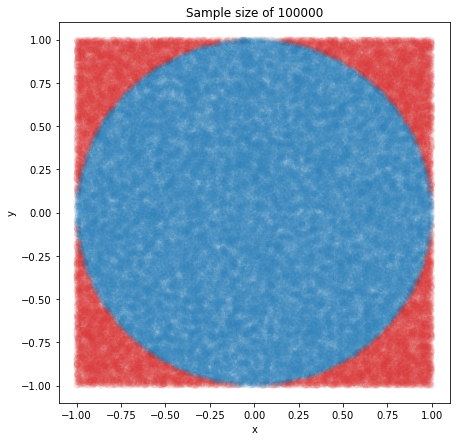

𝜋̂ based on a sample of 100000: 3.14336


In [11]:
# Plotting the sampled points and displaying the estimates for different sample sizes
np.random.seed(42)
r=1
dims=2
mc_experiments_params = [{"sample_size": 100, "alpha": 0.5},
                         {"sample_size": 1000, "alpha": 0.35},
                         {"sample_size": 10000, "alpha": 0.2},
                         {"sample_size": 100000, "alpha": 0.05}]


for experiment_params in mc_experiments_params:
    
    sample_size = experiment_params["sample_size"]
    title = f"Sample size of {sample_size}"
    alpha = experiment_params["alpha"]
    x = random_sampling(sample_size, dims, r)
    plot_sampled_points_2d(x, r, title, alpha)
    print(f"𝜋̂ based on a sample of {sample_size}: {round(calculate_pi_estimate(x), 6)}")

<p style='text-align: justify;'>&emsp;We notice that increasing the sample size produces a more accurate graphical representation of a circle and therefore a better estimate for $\pi$. Let us now consider the statistical properties of the Monte Carlo estimates. Since the Monte Carlo estimate is based on  a sum of independent random variable we can use the central limit theorem (CLT) to determine the distribution of the result. Let $\mu = \mathbb{E}[f(X)]$ and $\hat{\mu}$ denote the true mean and the MC approximation, respectively. Then:</p>
$$ $$
$$\begin{equation}
\hat{\mu} \sim \mathcal{N}(\mu, \frac{\sigma^2}{S})
\label{eq:CLT} \tag{3.9}
\end{equation} $$
$$ $$
$$\begin{equation}
\sigma^2 = var[f(X)] = \mathbb{E}[{f(X)}^2] - {\mathbb{E}[f(X)]}^2 = \mathbb{E}[{f(X)}^2] - \mu^2
\label{eq:variance} \tag{3.10}
\end{equation} $$
$$ $$
While $\sigma^2$ is often unknown in practice, it can be estimated:
$$ $$
$$\begin{equation}
\hat{\sigma}^2 = \frac{1}{S}\sum_{i=1}^S \left(f(X_i)-\hat{\mu}\right)^2
\label{eq:variance_hat} \tag{3.11}
\end{equation} $$
$$ $$
Note that we can make claims about the accuracy of the estimate such as:
$$ $$
$$\begin{equation}
\mathbb{P} \bigg\{\mu-1.96\frac{\hat{\sigma}}{\sqrt{S}}\leq\hat{\mu}\leq\mu+1.96\frac{\hat{\sigma}}{\sqrt{S}}\bigg\} \approx 0.95
\label{eq:confidence_interval} \tag{3.12}
\end{equation} $$
$$ $$

<p style='text-align: justify;'>&emsp;Let us run the Monte Carlo simulation 1000 times for different sample sizes and observe the distribution of outcomes.</p>

In [12]:
def multiple_monte_carlo_pi_estimations(count, sample_size):
    """
    This runs repeatedly the calculate_pi_estimate() function and stores the estimates in a list.
    :param count: int; number of times to run the function
    :param sample_size: int; sample_size use in calculate_pi_estimate()
    :return: list; list of Monte Carlo pi estimates
    """
    r=1
    dims=2
    pi_estimates = []
    for i in range(count):
        x = random_sampling(sample_size, dims, r)
        pi_estimates.append(calculate_pi_estimate(x))
    return pi_estimates

In [13]:
def plot_pi_estimates_distribution(pi_estimates, sample_size):
    """
    This function plots the distribution of Monte Carlo pi estimates.
    :param pi_estimates: list; list of Monte Carlo pi estimates
    :param sample_size: int; sample_size used to calculate the estimates
    :return: graph
    """
    
    mu, std = norm.fit(pi_estimates)
    plt.hist(pi_estimates, bins=10, density=True, alpha=0.4, color="#1f77b4")

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2, color="#d62728")
    title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
    plt.title(f"$\pi$ estimates from a sample size of {sample_size}")
    
    ax = plt.gca()
    ax.patch.set_alpha(0)
    plt.xlabel("$\hat{\pi}$")
    plt.ylabel("probability density")
    plt.show()
    plt.close()
    print(f"For sample size of {sample_size} we have 𝜋̂~({round(mu, 6)},{round(std**2, 6)})")

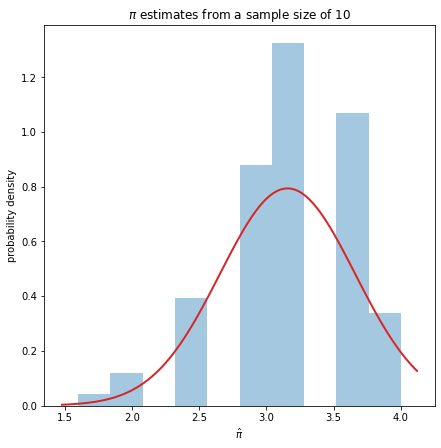

For sample size of 10 we have 𝜋̂~(3.1572,0.252408)


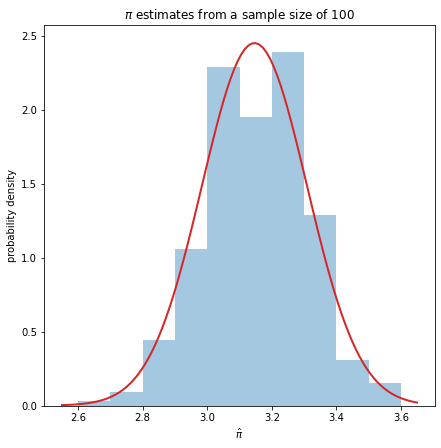

For sample size of 100 we have 𝜋̂~(3.14636,0.026478)


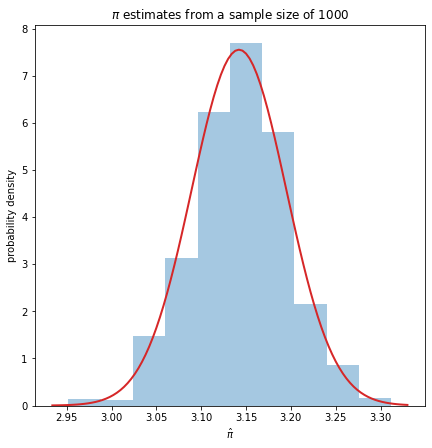

For sample size of 1000 we have 𝜋̂~(3.142152,0.002788)


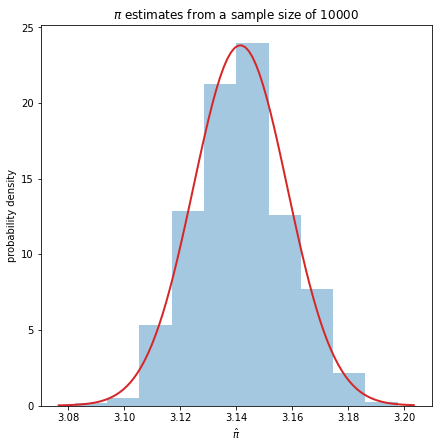

For sample size of 10000 we have 𝜋̂~(3.141461,0.000281)


In [14]:
# Monte Carlo estimate distribution for different sample sizes
np.random.seed(7)

for sample_size in [10, 100, 1000, 10000]:
    pi_estimates = multiple_monte_carlo_pi_estimations(count=1000, sample_size=sample_size)
    plot_pi_estimates_distribution(pi_estimates, sample_size)

In [15]:
# Calculating Monte Carlo pi estimate based on a million sampled points
x = random_sampling(sample_size=1000000, dims=2, r=1)
pi_estimate = calculate_pi_estimate(x)
print(pi_estimate)

3.145


In [16]:
def riemann_sum_approximation(func, a, b, delta=1e-3):
    """
    Riemann sum is a numerical integration technique based on the approximation of a integral by a
    finite sum. The midpoint rule is used in this implementation.
    :param func: function; the function whose integral we want to approximate
    :param a: list; a is a list of the lower limits of integration
    :param b: list; b is a list of the upper limit of integration (b > a)
    :param delta: float; default to 0.001 is the step size 
    :return: float; the riemann sum which approximates the integral from a to b
    """
    
    dims = len(a)
    steps = []
    for i in range(dims):
        steps.append(int((b[i]-a[i])/delta))
    
    a = [x + delta/2 for x in a]
    b = [x - delta/2 for x in b]

    x_i = []
    for i in range(dims):
        x_i.append(np.linspace(a[i], b[i], steps[i]))
    grid = np.array(np.meshgrid(*x_i, indexing='ij')).T
    points = grid.reshape(np.prod(steps), len(a))
    
    riemann_sum = np.sum(func(points)) * delta ** dims
    
    return riemann_sum

In [17]:
# Calculating a Riemann sum pi estimates based on different delta step sizes:
print("Riemann sum 𝜋 approximation with Δ=0.5 is {}".format(
    riemann_sum_approximation(unit_n_sphere_indicator_function, [-1, -1], [1, 1], delta=0.5)))
print("Riemann sum 𝜋 approximation with Δ=0.1 is {}".format(
    riemann_sum_approximation(unit_n_sphere_indicator_function, [-1, -1], [1, 1], delta=0.1)))
print("Riemann sum 𝜋 approximation with Δ=0.02 is {}".format(
    riemann_sum_approximation(unit_n_sphere_indicator_function, [-1, -1], [1, 1], delta=0.02)))
print("Riemann sum 𝜋 approximation with Δ=0.001 is {}".format(
    riemann_sum_approximation(unit_n_sphere_indicator_function, [-1, -1], [1, 1], delta=0.001)))

Riemann sum 𝜋 approximation with Δ=0.5 is 3.0
Riemann sum 𝜋 approximation with Δ=0.1 is 3.1600000000000006
Riemann sum 𝜋 approximation with Δ=0.02 is 3.144
Riemann sum 𝜋 approximation with Δ=0.001 is 3.141676


<p style='text-align: justify;'>&emsp;There is a clear tradeoff between Monte Carlo integration and Riemann sum approximation. The former produces an estimate drawn from a normal distribution around the true mean. We can control for the variance of that estimate by increasing (or decreasing) the number of samples used in the Monte Carlo simulation. On the other hand, the estimate produced by the Riemann sum is deterministic. However, we can notice from the examples above that the estimate is biased. This bias tends to decrease as we increase the granularity (i.e. decrease the step size delta).</p>

<p style='text-align: justify;'>&emsp;Let us now consider the time it takes to produce an estimate using each method with comparable precision. We will time multiple runs of each approach to determine whether there are any significant differences in the computational complexity.

In [18]:
def monte_carlo_time(sample_size, dims, repeat):
    """
    This function runs the Monte Carlo integration function multiple times and stores the execution
    times.
    :param sample_size: int; the sample size used in the monte carlo simulation
    :param dims: int; the number of dimension
    :param repeat: int; the number of times the experiment is repeated
    :return: list; list of execution times
    """
    r=1
    monte_carlo_times = []
    for i in range(repeat):
        start = time.time()
        x = random_sampling(sample_size, dims, r)
        monte_carlo_int = monte_carlo_integration(unit_n_sphere_indicator_function, x)
        end = time.time()
        monte_carlo_times.append(end - start)
        
    return monte_carlo_times

In [19]:
def reimann_sum_time(delta, dims, repeat):
    """
    This function runs the Riemann sum approximation function multiple times and stores the 
    execution times.
    :param delta: int; the delta (step size) used in the Riemann sum function
    :param dims: int; the number of dimension
    :param repeat: int; the number of times the experiment is repeated
    :return: list; list of execution times
    """

    a = dims * [-1]
    b = dims * [1]
    
    riemann_sum_times = []
    for i in range(repeat):
        start = time.time()
        riemann_sum_approximation(unit_n_sphere_indicator_function, a, b, delta)
        end = time.time()
        riemann_sum_times.append(end - start)
    
    return riemann_sum_times

In [20]:
def plot_times_histogram(monte_carlo_times, riemann_sum_times):   
    """
    Plot the distribution of times it took to run the Monte Carlo integration and the Riemann sum 
    approximation.
    :param monte_carlo_times: list; execution times for the Monte Carlo simulations
    :param riemann_sum_times: list; execution times for the Riemann sum approximation
    :param dims: int; number of dimensions used
    :return: graph
    """
        
    plt.hist(monte_carlo_times, bins=10, density=True, label="Monte Carlo", alpha=0.3)
    plt.hist(riemann_sum_times, bins=10, density=True, label="Riemann sum", alpha=0.3)
    ax = plt.gca()
    ax.patch.set_alpha(0)
    plt.title(f"Monte Carlo vs Riemann sum speed in {dims} dimensions")
    plt.xlabel("time (ms)")
    plt.ylabel("count")
    plt.legend()
    plt.show()

    print(f"Monte Carlo mean time: {sum(monte_carlo_times)/len(monte_carlo_times)}")
    print(f"Riemann sum mean time: {sum(riemann_sum_times)/len(riemann_sum_times)}")

For the first comparison of computational complexity, let us consider a 1-sphere, which is the equivalent of a circle in $\mathbb{R}^2$. Let us use a sample size of 10000 for the Monte Carlo integration.


The number of sampled points for the Riemann sum algorithm in a unit hybercube (an $n$-dimensional equivalent of a cube with sides equal to one) is given by:
$$ $$
$$\begin{equation}
s = \left(\frac{1}{\Delta}\right)^n 
\label{eq:evaluations_in_unit_hypercube} \tag{3.13}
\end{equation} $$
$$ $$
Since for the purpose of the problem we integrate from $-1$ to $1$ in each dimension, the total sample size of a Riemann sum algorithm would be given by:
$$ $$
$$\begin{equation}
S = \left(\frac{2}{\Delta}\right)^n 
\label{eq:evaluations} \tag{3.14}
\end{equation} $$
$$ $$
Thus, to get a sampling frequency equivalent to the one selected for the Monte Carlo simulation we choose  a step-size $\Delta=0.02$.
$$ $$
We choose to run each method a thousand times and observe the following distribution and average times. 

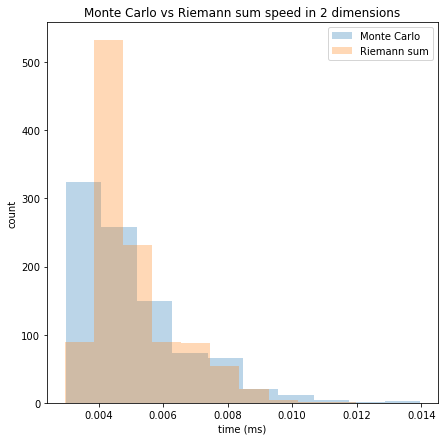

Monte Carlo mean time: 0.005323773622512818
Riemann sum mean time: 0.004839111804962158


In [21]:
# Comparing the time it takes to run Monte Carlo and Riemann sum in 2-dimensional space:
monte_carlo_times = monte_carlo_time(sample_size=10000, dims=2, repeat=1000)
riemann_sum_times = reimann_sum_time(delta=0.02, dims=2, repeat=1000)
plot_times_histogram(monte_carlo_times, riemann_sum_times)

<p style='text-align: justify;'>&emsp;The resulting times look comparable to one another. However, no statistical tests are made to back this claim. The point of this comparison is to show that the two methods operate at around the same order of computation complexity in lower dimensions. However, things are very different in high-dimensional spaces. The problem is rather obvious when we consider equation (3.13). The number of function values to be evaluated grows exponentially with the number of dimensions. So to keep the number of evaluations from growing the granularity should decrease and with lower granularity the bias would be greater.</p>
<p style='text-align: justify;'>&emsp;Consider the equivalent problem in 3-dimensions. Without adjusting the granularity of the Riemann sum function the computational time increases several orders of magnitude compared to that of the Monte Carlo method.

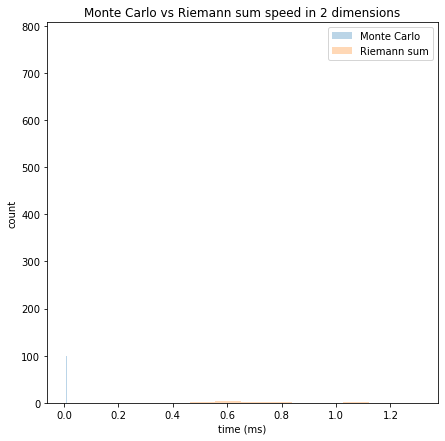

Monte Carlo mean time: 0.005834383964538574
Riemann sum mean time: 0.6897815203666687


In [22]:
# Comparing the time it takes to run Monte Carlo and Riemann sum in 3-dimensional space:
monte_carlo_times = monte_carlo_time(sample_size=10000, dims=3, repeat=100)
riemann_sum_times = reimann_sum_time(delta=0.02, dims=3, repeat=100)
plot_times_histogram(monte_carlo_times, riemann_sum_times)

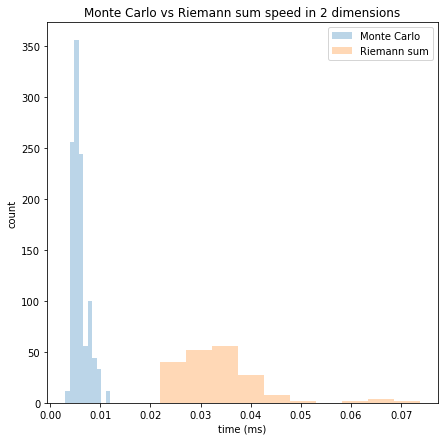

Monte Carlo mean time: 0.005704455375671387
Riemann sum mean time: 0.033889451026916505


In [23]:
# Comparing the time it takes to run Monte Carlo and Riemann sum in 3-dimensional space with 
# lower granularity of the Riemann sum:
monte_carlo_times = monte_carlo_time(sample_size=10000, dims=3, repeat=100)
riemann_sum_times = reimann_sum_time(delta=0.05, dims=3, repeat=100)
plot_times_histogram(monte_carlo_times, riemann_sum_times)

<p style='text-align: justify;'>&emsp;Even if we reduced granularity and risk having a higher bias, this still would not be enough to make this method feasible in very high-dimensional spaces. Consider a final example in a 10-dimensional space. The step delta of the deterministic numerical integration has to increase to 0.5 to keep the number of evaluations at a reasonable level. This is extremely low granularity as we show next.</p>

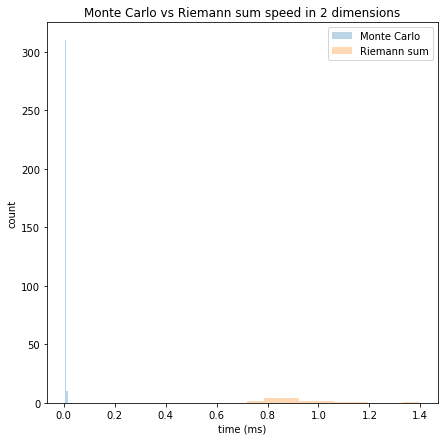

Monte Carlo mean time: 0.007509958744049072
Riemann sum mean time: 0.9245078420639038


In [24]:
# Comparing the time it takes to run Monte Carlo and Riemann sum in 10-dimensional space with 
# very low granularity of the Riemann sum:
monte_carlo_times = monte_carlo_time(sample_size=10000, dims=10, repeat=100)
riemann_sum_times = reimann_sum_time(delta=0.5, dims=10, repeat=100)
plot_times_histogram(monte_carlo_times, riemann_sum_times)

In [25]:
# Monte Carlo estimate of the volume of a 9-sphere (set of points in 10-dimensional Euclidean space)
x = random_sampling(sample_size=100000, dims=10, r=1)
print(monte_carlo_unit_n_sphere_volume_estimate(x))

2.42688


In [26]:
# Riemann sum approximation of the volume of a 9-sphere (10-dimensional Euclidean space)
print(riemann_sum_approximation(unit_n_sphere_indicator_function, 10*[-1], 10*[1], 0.3))

1.1246708735999995


In [27]:
print(f"Actual volume of a 9-sphere: {np.pi**5/120}")

Actual volume of a 9-sphere: 2.550164039877345


<p style='text-align: justify;'>&emsp;The results above show that Monte Carlo outperforms deterministic numerical integration in high-dimensional spaces in terms of both computational complexity and accuracy. This is due to the exponential growth of the number of evaluation in the standard numerical integration technique. This problem is known as the curse of dimensionality. Monte Carlo methods provide a way out of this exponential increase in computation time as long as the function is <a href="https://en.wikipedia.org/wiki/Pathological_(mathematics)">well-behaved</a>. 


</p>

### 4. Introduction to Options

#### __Thales of Milteus and the First Futures Contract__ 

<p style='text-align: justify;'>&emsp;..."Why do we need him?" some citizens of Miletus would say...</p>

<p style='text-align: justify;'>&emsp;...He is like the fox in the fable; he only calls the grapes sour because they hang way out of his reach...</p>

<p style='text-align: justify;'>&emsp;...One year the weather was exceptionally favourable and the olive trees were laden with olives...</p>

<p style='text-align: justify;'>&emsp;...The people of Miletus thronged to the owners of the olive presses, but to their amazement, they all met with the same reply...</p>

<p style='text-align: justify;'>&emsp;...You must go to Thales if you want to press your olives; he arranged to hire my press last winter, and carried it off at the beginning of Harvest time...</p>

<p style='text-align: justify;'>&emsp;...In exchange for a small deposit months ahead of the harvest, Thales had obtained the right to lease the presses at market prices during the harvest...</p>

<p style='text-align: justify;'>&emsp;Thales lived during 600 B.C. and was an aspiring philosopher. But he was constantly mocked for his useless writings and poverty. Thales was a practical man so he decided to make a fortune using his creativity and knowledge. He studied the weather and other conditions and soon decided that he expected a huge olive harvest (expecting a glut of olives). This was contrary to the public’s expectation of a light harvest. Thales took advantage of the market’s one-sided view and found the favorable optionality to exploit. Instead of betting directly on an olive oversupply – he went out and paid small fees to lease multiple olive presses for a fixed period of time. He reasoned that although indirect this was the best way of profiting from olive oil under the given conditions.</p>

#### __Futures and Options__

<p style='text-align: justify;'>&emsp;In general, people prefer certain outcome to uncertain ones. This holds true especially in the world of finance and investments. Investors like to be able to factor out the ability to profit and have a known outcome on what their potential loss could be. Derivative contracts such as futures and options can help structure a definite solution.</p>
$$ $$ 

##### Futures Contract:
<p style='text-align: justify;'>&emsp;Futures are a financial instrument defined on specific underlying variables (e.g. assets) that oblige the owner to purchase the underlying at a predetermined future price and date.</p>
$$ $$

##### Options Contract:
<p style='text-align: justify;'>&emsp;Options are a financial instrument defined on specific underlying variables (e.g. assets) that give the owner the right, but not the obligation to excercise them according to certain terms. The option gives the right to buy or sell the underlying at a predetermined price called strike price. Thus, their payoff (and value) depends on the underlying asset, as in all derivatives.</p>
$$ $$

#####  Main Types of Options:
* __Call Option__: The call buyer has the right to buy the underlying at the strike price for a set amount of time.
* __Put Option__: The call buyer has the right to sell the underlying at the strike price for a set amount of time. 
* __European Option__: The call buyer has the right to exercise the option only at maturity.
* __American Option__: The call buyer has the right to exercise the option at any time until maturity.

In [28]:
def plot_option_payoff(option_type, strike, show=True):
    """
    Plot call and put option payoff as a function of the underlying's price.
    :param option_type: string; whether the option is "call" or "put"
    :param strike: float; option's strike price
    :param show: bool; whether to show the plot or not
    :return: graph
    """
    
    x = np.linspace(0, 2 * strike, 10000)
    if option_type == "call":
        y = x - strike
        np.clip(y, 0, None, out=y)
    elif option_type == "put":
        y = strike - x
        np.clip(y, 0, None, out=y)
        
    ax = plt.gca()
    ax.patch.set_alpha(0)
    plt.plot(x, y)
    plt.title("Payoff {} option".format(option_type))
    plt.xlabel("Underlying price")
    plt.ylabel("Payoff")
    plt.show()

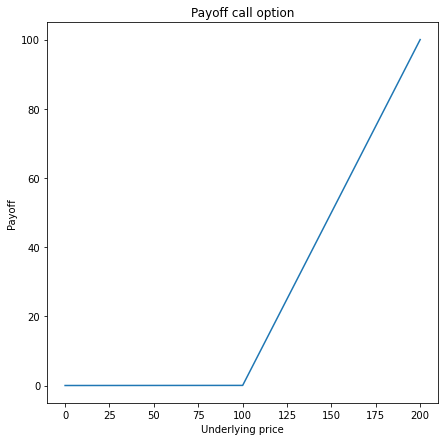

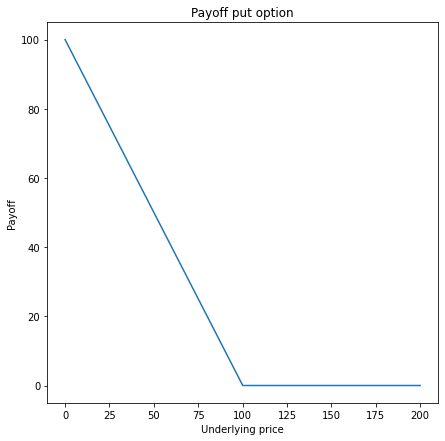

In [29]:
# Plotting the payoff of a call and put options with strike price 100
plot_option_payoff(option_type="call", strike=100, show=False)
plot_option_payoff(option_type="put", strike=100, show=True)

### 5. Binomial Option Pricing Model

<p style='text-align: justify;'>&emsp;In this section, we introduce the binomial model which will provide the framework for pricing options and other derivatives contracts in the following sections.
</p>
$$ $$ 

##### __Asset Universe:__
* Risky asset (Stock):
    + price $S_t$ at time $t \in I$
    + $I = \{0, 1, ..., T\}$
    + Dynamics of $S_t$:
$$\begin{equation}
S_t = \left\{
    \begin{array}\\
        uS_{t-1}& \text{with probability } p \\
        dS_{t-1} & \text{with probability } 1-p \\
    \end{array}
\right.
\label{eq:one_period_binomiak_model_stock_process_equation}
\end{equation}$$
    + $p \in (0, 1)$
    + Assume that $u=1/d>1$ to get a recombinig tree 
* Riskless asset (Bond):
    + with price $B_t$ at time $t \in I$
    + $r \geq 0 $ is the risk-free interest rate
    + $B_{t+1} = (1+r)B_t$ with $B_0=1$ for simplicity
    + $R = (1+r)$
$$ $$

##### __No Arbitrage Condition:__
<p style='text-align: justify;'>&emsp;We require that $0<d<1+r<u$. This condition prevents the possibility of making infinite profits. For instance, suppose that the payoff of the bond was strictly greater than the payoff of the stock in every state (i.e. $0<d<u<1+r$). In that case everyone will sell stocks to buy bonds. Market prices adjust to demand so arbitrage opportunities rarely exist and if they do they are quickly exhausted.</p>
$$ $$

##### __Derivative Securities:__
<p style='text-align: justify;'>&emsp;Now consider another asset $V$, whose payoff at time $T$ is determined by the payoff of the stock:</p>
$$ V_T=f(S_T)$$

<p style='text-align: justify;'>&emsp;The objective of the asset pricing model is to find the present value of this derivative contract $V_0$. This is not as trivial as it might initially seem. We can find the expected value of the derivative under the given probability measure, but we would not know how to discount it back to time $0$. We cannot use the risk-free rate since the payoff of the derivative is uncertain and we do not know how come up with a risk-adjusted discount factor without adding further assumptions.</p>

#### __One-Period Binomial Model__:

<p style='text-align: justify;'>&emsp;Firstly, let us consider a single pertiod Binomial model where we have $I = \{0, 1\}$. In this model there are two possible states - the one where the stock goes up and the one where the stock goes down. Note that there are also two assets with independent payoffs at time $1$. This means that we can create a replicating portfolio of those two assets that matches the payoff of any derivative security at each state. From the no-arbitrage principle it would follow that the value of the this derivate security must be equal to the value of the portfolio at time $0$. Since we know the current prices of the assets used in the replicating portfolio we can find the present value of the portfolio and, therefore, find the value of the derivative contract $V_0$.</p>

<p style='text-align: justify;'>&emsp;Suppose that we have an amount of money $V_0$ at time $0$. Let us allocate $\Delta$ amount to stocks and $B$ to bonds:</p>

$$\begin{equation}
V_0 = \Delta S_0 + B
\label{eq:replicating_portfolio_time_0} \tag{5.1}
\end{equation} $$
<p style='text-align: justify;'>&emsp;Now consider the following system of equations:</p>
$$
\begin{equation}
\left\{
 \begin{array}\\
        f(uS_0)= \Delta(uS_0) + BR\\
        f(dS_0)= \Delta(dS_0) + BR\\
    \end{array}
\right.
\label{eq:system_of_linear_equations_for_states} \tag{5.2}
\end{equation}
$$

<p style='text-align: justify;'>&emsp;If the above equations hold the portoflio of $\Delta$ allocated to stocks and $B$ bonds will replicate the payoff of $V_1$ at each of the two possible states.</p>
<p style='text-align: justify;'>&emsp;Solving for $\Delta$ and $B$ we obtain:</p>

$$\begin{equation}
\Delta^*= \frac{f(uS_0)-f(dS_0)}{(u-d)S_0}
\label{eq:delta} \tag{5.3}
\end{equation} $$

$$\begin{equation}
B^* = R^{-1}[f(uS_0) - \Delta^* uS_0]
\label{eq:B} \tag{5.4}
\end{equation} $$

<p style='text-align: justify;'>&emsp;Using $\Delta^*$ and $B^*$ we can calculate the $V_0$:</p>

$$\begin{equation}
V_0 = \Delta^* S_0 + B^*
\label{eq:pv_replicating_portfolio} \tag{5.5}
\end{equation} $$

<p style='text-align: justify;'>&emsp;Thus, we have shown that in a one-period binomial model it is possible to find the present value of any derivative contract. This happened because the number of securities matches the number of states. This is known as an Arrow-Debreu market or a complete market.</p>

<p style='text-align: justify;'>&emsp;Notice that the probability that we assigned to the stock going up had no influence on the derivative's price since we have created a perfect hedge for the derivate. Therefore, there was no need to concern ourselves with an appropriate risk-adjusted discount factor. However, it might be useful to consider a different interpretation the probability measure used in the stock process.</p>

#### __Risk-Neutral Measure__:

<p style='text-align: justify;'>&emsp;Since the probability measure doesn't influence our valuation formula let us select a specifict probability measure $\tilde{\mathbb{P}}$ for which it holds that:</p>

$$\begin{equation}
S_0 = \frac{\tilde{\mathbb{E}}[S_1]}{R}
\label{eq:pv_replicating_portfolio} \tag{5.6}
\end{equation} $$

<p style='text-align: justify;'>&emsp;This property is called the Martingale property and is extremely useful in option pricing. The probability measure under which the discounted stock price process is a martingale is called risk-neutral measure.</p>

<p style='text-align: justify;'>&emsp;To find the risk-neutral measure in a binomial model we must solve the following equation for $\tilde{p}$:</p>

$$S_0 = \frac{[\tilde{p}uS_0 + (1-\tilde{p})dS_0]}{R}$$

$$\begin{equation}
\tilde{p} = \frac{R-d}{u-d}
\label{eq:risk_neutral_measure_p} \tag{5.7}
\end{equation} $$

<p style='text-align: justify;'>&emsp;This is an extremely powerful result because now we can express the price of any derivative contract as the expected payoff under the risk-neutral measure discounted by the risk-free rate.
$$ $$

$$\begin{equation}
V_0 = \frac{[\tilde{p}f(uS_0) + (1-\tilde{p})f(dS_0)]}{R} 
\label{eq:pv_derivative_risk_neutral_valuation} \tag{5.8}
\end{equation} $$
$$ $$

#### __Two-Period Binomial Model__:

<p style='text-align: justify;'>&emsp;Now consider a two-period binomial model. At time $2$ the stock process can take on the following set of values:</p>
$$ S_2 \in \{u^2S_0, udS_0, duS_0, d^2S_0\} $$ 
<p style='text-align: justify;'>&emsp;The market is no longer complete. Since there are more states than securities we cannot replicate a derivative's payoff at every state. However, on every step of the process there are only two outcomes which is equal to the number of securities available in the market. In this case, we can say that the markets are dynamically complete. Therefore, at each step we can construct a replicating portfolio for the next two states and replicate the security dynamically. Starting from period 2 we can work backwards in time and arrive at the present value of any derivative contract.

#### __Two-Period Binomial Model Call Option Example__:

<p style='text-align: justify;'>&emsp;Consider an $2$-period binomial model example with the following parameters:</p>

* $T=2$
* $S_0=\$4$
* $u=1/d=2$
* $r=0.25$
* $C_2(S_2)=max\{S_2-K, 0\}$ - call option
* $K=5$ - strike price of the call option

<p style='text-align: justify;'>&emsp;The possible states are given by $\Omega = \{uu,ud,du,dd\}$</p>

<p style='text-align: justify;'>&emsp;Let us denote the replicating portfolio with $V$ such that $V_2(\omega S_0) = C_2(\omega S_0), \forall \omega \in \Omega$. Thus, we have:</p>

* $V_2(uuS_0) = max\{2^24-5, 0\} = 11$
* $V_2(udS_0) = max\{2(0.5)4-5, 0\} = 0$
* $V_2(duS_0) = max\{2(0.5)4-5, 0\} = 0$
* $V_2(ddS_0) = max\{(0.5)^24-5, 0\} = 0$

<p style='text-align: justify;'>&emsp;The deltas of the hedging portfolio (see equation 5.3) at time $t=1$ in each state are given by:</p>
$$ $$
$$ \Delta_1(u)= \frac{V_1(uuS_0)-V_2(udS_0)}{uuS_0-udS_0}= \frac{11-0}{16-4}=\frac{11}{12} $$
$$ $$
$$ \Delta_1(d)= \frac{V_1(duS_0)-V_2(ddS_0)}{duS_0-ddS_0}= \frac{0-0}{4-1}=0 $$
$$ $$
<p style='text-align: justify;'>&emsp;The amounts allocated to the risk-free asset (see equation 5.4) at time $t=1$ in each state are given by:</p>
$$ $$ 
$$ B(u) = R^{-1}[V_2(uuS_0) -  \Delta_1(u) uuS_0] = \frac{4}{5}[11-\frac{11}{12}\times16] = -\frac{44}{15}$$
$$ $$
$$ B(d) = R^{-1}[V_2(duS_0) -  \Delta_1(d) duS_0] = \frac{4}{5}[0-0\times4]=0$$
$$ $$ 
<p style='text-align: justify;'>&emsp;The values of the replicating portfolio of the option (see equation 5.5) at time $t=1$ in each state are given by:</p>
$$ $$ 
$$ V_1(u) = \Delta(u)uS_0 + B(u) = \frac{11}{12}\times8 -\frac{44}{15}=4.4$$
$$ $$ 
$$ V_1(d) = \Delta(d)dS_0 + B(d) = 0\times2 + 0 = 0$$
$$ $$ 

<p style='text-align: justify;'>&emsp;The delta of the hedging portfolio at time $t=0$ is given by:</p>
$$ $$
$$ \Delta_0= \frac{V_1(u)-V_1(d)}{uS_0-dS_0}= \frac{4.4-0}{8-2}=\frac{11}{15} $$
$$ $$

<p style='text-align: justify;'>&emsp;The amount allocated to the risk-free asset at time $t=0$ is given by:</p>
$$ $$ 
$$ B_0 = R^{-1}[V_1(u) - \Delta_0 uS_0] = \frac{4}{5}[4.4-\frac{11}{15}\times8] = -\frac{88}{75}$$
$$ $$

<p style='text-align: justify;'>&emsp;The value of the replicating portfolio of the option at time $t=0$ is given by:</p>
$$ $$ 
$$ V_0 = \Delta_0S_0 + B_0 = \frac{11}{15}\times4 -\frac{88}{75}=1.76$$
$$ $$ 
<p style='text-align: justify;'>&emsp;Alternatively we can compute the risk-neutral probability measure and use the result to price the option. See equations 5.7 and 5.8, respectively:</p>
$$ $$
$$ \tilde{p} = \frac{R-d}{u-d} = \frac{1.25-0.5}{2-0.5} = 0.5$$ 
$$ $$
$$ V_1(u) = R^{-1}\left[\tilde{p}V_2(uuS_0) + (1-\tilde{p})V_2(udS_0)\right]=\frac{4}{5}\left[0.5\times11 + 0.5\times0\right]=4.4$$
$$ $$
$$ V_1(d) = R^{-1}\left[\tilde{p}V_2(duS_0) + (1-\tilde{p})V_2(ddS_0)\right]=\frac{4}{5}\left[0.5\times0 + 0.5\times0\right]=0$$
$$ $$
$$ V_0 = R^{-1}\left[\tilde{p}V_1(uS_0) + (1-\tilde{p})V_1(dS_0)\right]=\frac{4}{5}\left[0.5\times4.4 + 0.5\times0\right]=1.76$$
$$ $$

#### __Cox-Ross-Rubinstein Model__:
$$ $$
<p style='text-align: justify;'>&emsp;We can use the principles of a dynamic hedging portfolio to generalize to a n-period binomial model for option pricing. This multi-period model is widely known as Cox-Ross-Rubinstein model.</p>

<p style='text-align: justify;'>&emsp;The probability of any state of nature under the martingale probabilities is completely determined by the number of upward moves:</p>
$$ \tilde{p}(n) = \tilde{p}^n(1-\tilde{p})^{T-n}$$
$$ S(T) = S(0)u^nd^{T-n}$$

<p style='text-align: justify;'>&emsp;In general, given $S(t)$, the probability that there will be $n \leq T-t$ upward moves after $t$ is given by:</p>

$$ C_{T-t}^{n}(\tilde{p})^n(1-\tilde{p})^{T-t-n}$$
$$ S(T) = S(t)u^nd^{T-t-n}$$

<p style='text-align: justify;'>&emsp;where $C_{T-t}^{n}=\frac{T!}{n!(T-n)!}$</p>

<p style='text-align: justify;'>&emsp;Let $V$ denote the price of a European call option with strike price $K$. Then:</p>

$$ V_T = max\{S(T)-K, 0\} $$
$$ V_t = \tilde{\mathbb{E}}_t\big[max\{S(T)-K, 0\}R^{-(T-t)}\big] $$
$$\begin{equation}
V_t = R^{-(T-t)}\sum_{n=0}^{T-t} C_{T-t}^{n}(\tilde{p})^n(1-\tilde{p})^{T-t-n}max\{S(t)u^nd^{T-t-n}-K, 0\}
\label{eq:cox-ross-rubinstein-1} \tag{5.9}
\end{equation} $$
$$ $$

<p style='text-align: justify;'>&emsp;Let $j\equiv$ minimum number of upward moves such that $S(t)u^nd^{T-t-n} \geq k$</p>

$$j \geq \frac{ln\left[K/(S(t)d^{T-t})\right]}{ln(u/d)} \text{ where } j \in \mathbb{Z}_{++}$$

<p style='text-align: justify;'>&emsp;Then:</p>

$$ V_t = R^{-(T-t)}\sum_{n=j}^{T-t} C_{T-t}^{n}(\tilde{p})^n(1-\tilde{p})^{T-t-n}[S(t)u^nd^{T-t-n}-K]$$
$$ V_t = S(t)\sum_{n=j}^{T-t} C_{T-t}^{n}\left(\frac{\tilde{p}u}{R}\right)^n\left(\frac{(1-\tilde{p})d}{R}\right)^{T-t-n} - KR^{-(T-t)}\sum_{n=j}^{T-t} C_{T-t}^{n}(\tilde{p})^n(1-\tilde{p})^{T-t-n}$$


### 6. Vanilla Option Pricing

In [30]:
def cox_ross_rubinstein_option_price(option_type, stock_price_t, strike, u, d, r, t, t_maturity):
    
    """
    Cox-Ross-Rubinstein option pricer. See equation 5.9
    :param option_type: string; either "call" or "put"
    :param stock_price_t: float; the stock price at time t
    :param strike: float; float; the strike price of the option
    :param u: float; upward price movement, u > 1
    :param d: float; downward price movement, d < 1
    :param r: float; the risk-free interest rate
    :param t: int; current period
    :param t_maturity: int; the period at which the option expires
    :return: float; the value of the option at time t
    """
    
    # Obtain the risk-neutral probability measure
    risk_neutral_p = (1+r-d)/(u-d)
    
    tau = t_maturity - t
    
    # Calculate all possible states at t_maturity, i.e. stock prices
    states = [stock_price_t*(u**n)*(d**(tau-n)) for n in range(0, tau+1)]
    
    # Option payoff at t_maturity depending on option_type
    if option_type == "call":
        states_less_strike = np.array(states) - strike
        option_payoffs = np.where(states_less_strike < 0, 0, states_less_strike)
    elif option_type == "put":
        strike_less_states = strike - np.array(states)
        option_payoffs = np.where(strike_less_states < 0, 0, strike_less_states)
    
    # Calculate the probability of each state
    state_probs = np.array([comb(tau, n)*(risk_neutral_p**n)*((1-risk_neutral_p)**(tau-n))
                            for n in range(0, tau+1)])
    
    # Expected payoff
    expected_option_payoff = sum(np.multiply(state_probs, option_payoffs))
    
    # Discounted expected payoff
    option_value = (1 + r) ** (-tau) * expected_option_payoff
    
    return option_value

In [31]:
# European call option with the same parameters as the one in the 2-period binomial model example
# The price was 1.76
print(cox_ross_rubinstein_option_price(option_type="call",
                                       stock_price_t=4,
                                       strike=5, 
                                       u=2,
                                       d=0.5,
                                       r=0.25,
                                       t=0,
                                       t_maturity=2))

1.76


In [32]:
def monte_carlo_sample_states(p, tau, stock_price_t, u, d, sample_size):
    """
    Sample states from a binomial distribution.
    :param p: float; probability measure used in the sampling
    :param tau: int; remaining periods until maturity used as the number of trials in the
    binomial sampling procedure
    :param stock_price_t: float; the stock price at time t,
    :param u: float; upward price movement, u > 1
    :param d: float; downward price movement, d < 1
    :param sample_size: int; the period at which the option expires
    :return: float; the value of the option at time t
    """
    samples = np.random.binomial(n=tau, p=p, size=sample_size)
    sample_states = [stock_price_t * (u**x) * (d**(tau-x)) for x in samples]
    return sample_states

In [33]:
def monte_carlo_option_price_estimate(option_type, stock_price_t, strike, u, d, r, t, t_maturity,
                                     sample_size):
    """
    Option price estimate based on Monte Carlo state simualtion.
    :param option_type: string; either "call" or "put"
    :param stock_price_t: float; the stock price at time t, default to 4
    :param strike: float; float; the strike price of the option
    :param u: float; upward price movement, u > 1
    :param d: float; downward price movement, d < 1
    :param r: float; the risk-free interest rate
    :param t: int; current period
    :param t_maturity: int; the period at which the option expires
    :param sample_size: int; the period at which the option expires
    :return: float; the value of the option at time t
    """
    # Obtain the risk-neutral probability measure
    risk_neutral_p = (1+r-d)/(u-d)
    
    tau = t_maturity - t
    
    # Monte Carlo simulation: states, i.e. stock prices
    sample_states = monte_carlo_sample_states(risk_neutral_p, tau, stock_price_t, u, d, sample_size)
    states = sorted(list(set(sample_states)))
    state_count_dict = Counter(sample_states)
    
    # Option payoff at t_maturity depending on option_type
    if option_type == "call":
        states_less_strike = np.array(states) - strike
        option_payoffs = np.where(states_less_strike < 0, 0, states_less_strike)
    elif option_type == "put":
        strike_less_states = strike - np.array(states)
        option_payoffs = np.where(strike_less_states < 0, 0, strike_less_states)
        
    # Expected payoff
    expected_option_payoff = 0
    for i, state in enumerate(states):
        expected_option_payoff += option_payoffs[i] * state_count_dict[state] / sample_size
    
    # Discounted expected payoff
    option_value = (1 + r) ** (-tau) * expected_option_payoff
    
    return option_value

In [34]:
# European call option with the same parameters as the one in the 2-period binomial model example
# The price was 1.76
print(monte_carlo_option_price_estimate(option_type="call",
                                        stock_price_t=4,
                                        strike=5, 
                                        u=2,
                                        d=0.5,
                                        r=0.25,
                                        t=0,
                                        t_maturity=2,
                                        sample_size=100000))

1.7833728


In [35]:
def multiple_monte_carlo_option_price_estimations(count, sample_size):
    """
    This runs repeatedly the monte_carlo_option_price_estimate() function and stores the
    estimates in a list.
    :param count: int; number of times to run the function
    :param sample_size: int; sample_size use in monte_carlo_option_price_estimate()
    :return: list; list of Monte Carlo pi estimates
    """
    option_price_estimates = []
    for i in range(count):
        option_price = monte_carlo_option_price_estimate(option_type="call",
                                                         stock_price_t=4,
                                                         strike=5, 
                                                         u=2,
                                                         d=0.5,
                                                         r=0.25,
                                                         t=0,
                                                         t_maturity=2,
                                                         sample_size=sample_size)
        option_price_estimates.append(option_price)
    return option_price_estimates

In [36]:
def plot_option_price_estimates_distribution(option_estimates):
    """
    This function plots the distribution of Monte Carlo option price estimates.
    :param option_estimates: list; list of Monte Carlo option_estimates estimates
    :return: graph
    """
    
    mu, std = norm.fit(option_estimates)
    plt.hist(option_estimates, bins=10, density=True, alpha=0.4, color="#1f77b4")

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2, color="#d62728")
    title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
    plt.title(f"Monte Carlo option price estimates")
    
    ax = plt.gca()
    ax.patch.set_alpha(0)
    plt.xlabel("option price estimate")
    plt.ylabel("probability density")
    plt.show()
    plt.close()

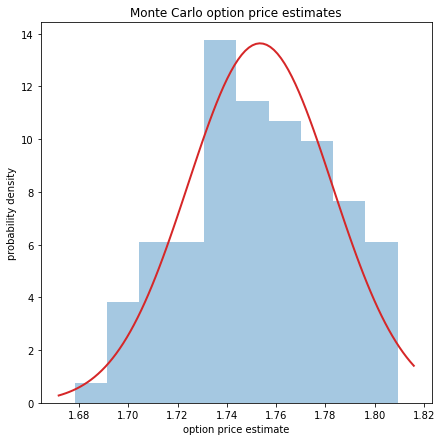

In [37]:
estimates = multiple_monte_carlo_option_price_estimations(count=100, sample_size=10000)
plot_option_price_estimates_distribution(estimates)

<p style='text-align: justify;'>&emsp;While Monte Carlo methods can be applied to pricing a vanilla option they are inferior to methods based on the analytical solution to the problem. The Monte Carlo cannot compare to the Cox-Ross-Rubinstein model neither in terms of accuracy, nor in terms of speed. However, this does not mean Monte Carlo methods are useless for other problems in option pricing. Let us consider a different type of options.</p>

### 7. Path Dependent Options

<p style='text-align: justify;'>&emsp;Until now the options we considered were only based on the state at maturity. Their payoff was a function of the underlyings price at expiry and was not affected by the underlying's price path before that. However, there is a different type of options whose payoff is determined by their underlyings price history. These options are called path dependent.</p>

<p style='text-align: justify;'>&emsp;Consider the same European call option we used in the previous examples but this time with a barrier. A barrier is a certain level which if crossed at any time will render the option contract void. In other words if a barrier is breached at any point the payoff is 0. While still possible to fit this detail into the binomial model framework, note that instead of having to compute the states at the last period now we should think about the set of possible paths, which is a power set. Thus, for high number of periods we face a constraint in terms of computational time. This however, is the type of situation in which Monte Carlo methods excel.</p>

In [38]:
def monte_carlo_sample_price_paths(p, tau, stock_price_t, u, d, sample_size):
    """
    Sample price paths from a binomial distribution.
    :param p: float; probability measure used in the sampling
    :param tau: int; remaining periods until maturity used as the number of trials in the
    binomial sampling procedure
    :param stock_price_t: float; the stock price at time t,
    :param u: float; upward price movement, u > 1
    :param d: float; downward price movement, d < 1
    :param sample_size: int; the period at which the option expires
    :return: float; the value of the option at time t
    """
    
    # Different to sampling states; sample price innovations so we use bern(p) = bin(1, p)
    samples = np.random.binomial(n=1, p=p, size=(sample_size, tau))
    # Use the innovations to create a process
    cumulative_samples = np.cumsum(samples, axis=1)
    # Use initial condition for the stock price to arrive at the desired stock sample price process
    price_paths = [[stock_price_t * (u**n) * (d**(i+1-n)) for i, n in enumerate(cumulative_sample)]
                   for cumulative_sample in cumulative_samples]
    price_paths = [[stock_price_t] + price_path for price_path in price_paths]
    return price_paths

In [39]:
def plot_monte_carlo_price_paths(price_paths, log=False, alpha=0.2):
    """
    This function plots the price paths of Monte Carlo option price estimates.
    :param option_estimates: list; list of Monte Carlo option_estimates estimates
    :return: graph
    """

    plt.plot(np.array(price_paths).T, alpha=alpha)
    if log:
        plt.yscale('log',base=10)
        plt.title("Monte Carlo Log-Price Paths")
        plt.ylabel("log price")
    else:
        plt.title("Monte Carlo Price Paths")
        plt.ylabel("price")
    plt.xlabel("t")
    ax = plt.gca()
    ax.patch.set_alpha(0)
    plt.show()

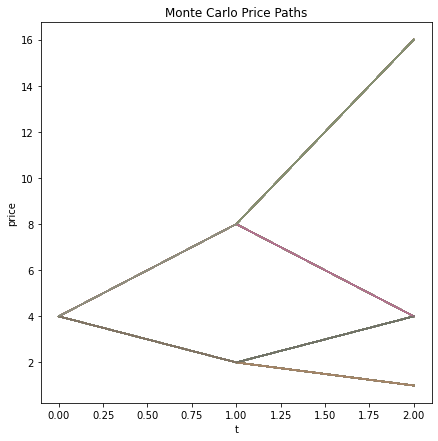

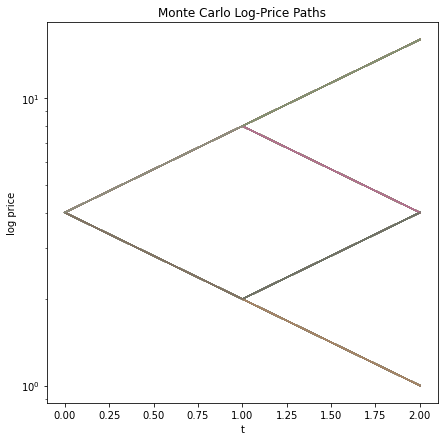

In [40]:
# Monte Carlo price path visualization for 2-period binomial (for validation)
price_paths = monte_carlo_sample_price_paths(0.5, 2, 4, 2, 0.5, 1000)
plot_monte_carlo_price_paths(price_paths, alpha=0.2)
plot_monte_carlo_price_paths(price_paths, log=True, alpha=0.2)

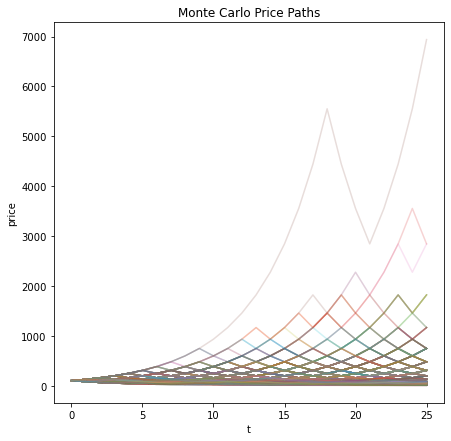

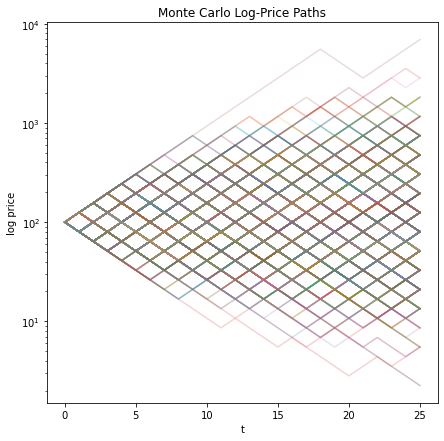

In [41]:
# Monte Carlo price path visualization 25-period binomial
price_paths = monte_carlo_sample_price_paths(0.5, 25, 100, 1.25, 0.8, 1000)
plot_monte_carlo_price_paths(price_paths, alpha=0.2)
plot_monte_carlo_price_paths(price_paths, log=True, alpha=0.2)

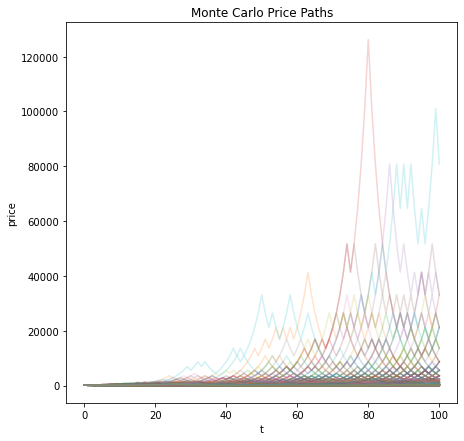

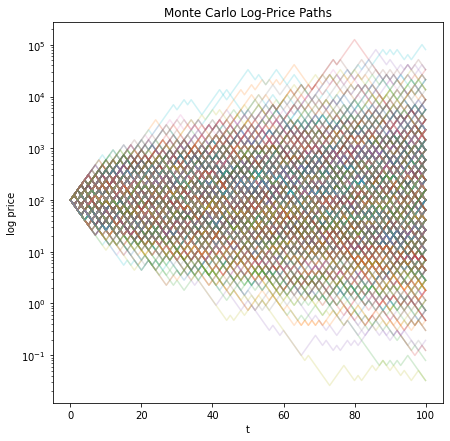

In [42]:
# Monte Carlo price path visualization 100-period binomial
price_paths = monte_carlo_sample_price_paths(0.5, 100, 100, 1.25, 0.8, 1000)
plot_monte_carlo_price_paths(price_paths, alpha=0.2)
plot_monte_carlo_price_paths(price_paths, log=True, alpha=0.2)

In [43]:
def monte_carlo_barrier_option_price_estimate(option_type, stock_price_t, strike, barrier,
                                              comparator, u, d, r, t, t_maturity, sample_size):
    """
    Barrier option price estimate based on Monte Carlo price path simualtion.
    :param option_type: string; either "call" or "put"
    :param stock_price_t: float; the stock price at time t, default to 4
    :param strike: float; the strike price of the option
    :param barrier: float; the barrier level of the option
    :param comparator: string; whether the barrier is triggered if "above" or "below"
    :param u: float; upward price movement, u > 1
    :param d: float; downward price movement, d < 1
    :param r: float; the risk-free interest rate
    :param t: int; current period
    :param t_maturity: int; the period at which the option expires
    :param sample_size: int; the period at which the option expires
    :return: float; the value of the option at time t
    """
    # Obtain the risk-neutral probability measure
    risk_neutral_p = (1+r-d)/(u-d)
    
    tau = t_maturity - t
    
    # Monte Carlo simulation: states, i.e. stock prices
    sample_price_paths = monte_carlo_sample_price_paths(risk_neutral_p,
                                                        tau, 
                                                        stock_price_t,
                                                        u, 
                                                        d,
                                                        sample_size)
    
    # Remove price paths that hit the barrier:
    states = []
    if comparator == "above":
        states = [price_path[-1] for price_path in sample_price_paths if
                 all(x < barrier for x in price_path)]
    elif comparator == "below":
        states = [price_path[-1] for price_path in sample_price_paths if
                 all(x > barrier for x in price_path)]
    
    # States, i.e. stock prices
    state_count_dict = Counter(states)
    states = sorted(list(set(states)))
    
    # Option payoff at t_maturity depending on option_type
    if option_type == "call":
        states_less_strike = np.array(states) - strike
        option_payoffs = np.where(states_less_strike < 0, 0, states_less_strike)
    elif option_type == "put":
        strike_less_states = strike - np.array(states)
        option_payoffs = np.where(strike_less_states < 0, 0, strike_less_states)
        
    # Expected payoff
    expected_option_payoff = 0
    for i, state in enumerate(states):
        expected_option_payoff += option_payoffs[i] * state_count_dict[state] / sample_size
    
    # Discounted expected payoff
    option_value = (1 + r) ** (-tau) * expected_option_payoff
    
    return option_value

In [44]:
# European barrier call option with the same parameters as the one in the 2-period binomial model
# example and barrier at 20 that can never be reached
# Therefore, the result should be also close to 1.76 (for validation)
print(monte_carlo_barrier_option_price_estimate(option_type="call",
                                                stock_price_t=4,
                                                strike=5, 
                                                barrier=20,
                                                comparator="above",
                                                u=2,
                                                d=0.5,
                                                r=0.25,
                                                t=0,
                                                t_maturity=2,
                                                sample_size=10000))

1.769152


In [45]:
# European barrier call option with the same parameters as the one in the 2-period binomial model
# example and barrier at 0.01 which is always hit
# Therefore, the result should be also close to 0 (for validation)
print(monte_carlo_barrier_option_price_estimate(option_type="call",
                                                stock_price_t=4,
                                                strike=5, 
                                                barrier=0.01,
                                                comparator="above",
                                                u=2,
                                                d=0.5,
                                                r=0.25,
                                                t=0,
                                                t_maturity=2,
                                                sample_size=10000))

0.0


In [46]:
# Pricing a barrier call option in a 100-period binomial 
print(monte_carlo_barrier_option_price_estimate(option_type="call",
                                                stock_price_t=100,
                                                strike=80, 
                                                barrier=120,
                                                comparator="above",
                                                u=1.01,
                                                d=0.99,
                                                r=0.0001,
                                                t=0,
                                                t_maturity=100,
                                                sample_size=10000))

18.002619148575075


In [47]:
# Pricing a barrier put option in a 100-period binomial 
print(monte_carlo_barrier_option_price_estimate(option_type="put",
                                                stock_price_t=100,
                                                strike=110, 
                                                barrier=115,
                                                comparator="above",
                                                u=1.01,
                                                d=0.99,
                                                r=0.0001,
                                                t=0,
                                                t_maturity=100,
                                                sample_size=10000))

10.111452222188978


### 8. Conclusion

<p style='text-align: justify;'>&emsp;We have shown that when deterministic numerical techniques fail in high-dimensional space Monte Carlo methods provide an escape from the exponential computational time trap. We also showed that when a problem is too complex to solve analytically Monte Carlo simulations provide a viable way of obtaining an estimate for the solution.</p>

<p style='text-align: justify;'>&emsp;The topic of Monte Carlo methods in option pricing is far from exhausted. While these methods yield results in areas where standard techniques fail we should look for alternatives that improve on what Monte Carlo offers us. In practice, thousands of options are being traded every second, and quotes on those derivatives are provided continuously. Monte Carlo simulations are too slow to keep up with the pace of financial markets at a scale. In recent years, there has been a shift from relying on Monte Carlo simulation in real-time to training artificial neural networks on those simulations. The neural networks learn the option pricing function in terms of the parameters used in the simulation and after successful training, it is able to recall the price of a specific contract much faster than running a simulation on the spot.</p>

<p style='text-align: justify;'>&emsp;An interesting idea for further research might be to experiment if a neural network can learn not only to price the derivatives but also dynamically hedge them by adjusting the weights of the underlying assets in a replication portfolio.</p>

### 9. Resources

- https://en.wikipedia.org/wiki/Monte_Carlo_method
- https://en.wikipedia.org/wiki/N-sphere
- https://speculatorsanonymous.com/articles/understanding-optionality-with-thales/
- https://www.uio.no/studier/emner/matnat/math/STK-MAT3700/h18/lectures/binomial-and-black-scholes-models-.pdf
- John C. COX and Stephen A. ROSS and Mark RUBINSTEIN "Option Pricing: A Simplified Approach", Journal of Financial Economics 7 (1979) 229-263.
- Murphy, Kevin P., Machine learning: a probabilistic perspective, MIT Press, (2012).
- Tsomocos, Dimitrios P., Lecture Slides Asset Pricing: Lecture 3 Options
- Piatti, Ilaria, Continuous Time Finance Course Pack

### 10. Appendix

In [48]:
def black_scholes_option_price(option_type, 
                               stock_price_t, 
                               strike, 
                               t,
                               t_maturity,
                               interest_rate,
                               volatility):
    
    tau = t_maturity - t
    d_1 = (np.log(stock_price_t / strike) - (interest_rate + 0.5 * volatility ** 2) * tau) / \
    (volatility * np.sqrt(tau))
    d_2  = d_1 - volatility * np.sqrt(tau)
    
    if option_type == "call":
        option_value = norm.cdf(d_1) * stock_price_t - \
        norm.cdf(d_2) * strike * np.exp( -interest_rate * tau)
    elif option_type == "put":
        option_value = norm.cdf(-d_2) * strike * np.exp( -interest_rate * tau) - \
        norm.cdf(-d_1) * stock_price_t
        
    return option_value

In [49]:
def plot_option_payoff(option_type, strike, show=True):
    
    x = np.linspace(0, 2 * strike, 10000)
    if option_type == "call":
        y = x - strike
        np.clip(y, 0, None, out=y)
    elif option_type == "put":
        y = strike - x
        np.clip(y, 0, None, out=y)
        
    ax = plt.gca()
    ax.patch.set_alpha(0)
    plt.plot(x, y)
    plt.title("Payoff {} option".format(option_type))
    plt.xlabel("Underlying price")
    plt.ylabel("Payoff")
    plt.show()

In [50]:
print(black_scholes_option_price("call", 100, 100, 0, 1, 0.01, 0.15))

6.223441188786374
